# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Tarea 02: Extracción y Transformación de Datos </center></h1>

## Instrucciones

- Fecha de publicación: martes 10 de septiembre de 2024.

- Fecha de límite de entrega: martes 1 de octubre de 2024, a las 23:59.

- Vía de entrega: En el módulo de tareas en Canvas, en el ítem 'Tarea 2'.

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del canal de Tareas en el Foro del curso en Canvas.


## 1. Objetivos de la Tarea

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la extracción de datos principalmente, con algo de transformación también. 

En los ejercicios a desarrollar a continuación, usted deberá extraer y transformar datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.


### 1.2 Pregunta de ciencia de datos

Como comentamos en clases, el objetivo final de las herramientas en ciencia de datos es poder entender mejor un fenómeno o contestar alguna pregunta relevante. En este caso, queremos saber cuáles son las películas más importantes de habla hispana, sus ingresos a nivel mundial y de qué país proceden.

## 2. Datos

Para esta tarea estaremos aprovechando la base de datos de `The Movie Data Base TMDB` que está disponible acá: https://www.themoviedb.org/

### 2.1 Acceso a la API

La cominucación con TMDB es vía API que requiere una clave única para cada uno/a de ustedes. Para conseguirse su API Key deben crearse una cuenta acá: https://www.themoviedb.org/account/signup y, en la sección de API, crear una nueva aplicación que les dará una API Key única para ustedes.


### 2.2 Documentación

Para poder usar la API, deben revisar la documentación de TMDB que explica cómo se usa cada uno de los elementos. Esto les puede tomar tiempo, así que no dejen para último momento esta tarea.

In [1]:
# Importación de librerías: importe las siguientes librerías, usando alias comunes
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

## 3. Desarrollo

Ahora trabajaremos en crear un gráfico con los ingresos de las películas más populares que fueron estrenadas ultimamente.

### 3.1 Base de datos de películas (2 puntos)

Estudie cómo se puede acceder a las películar más populares usando la API y filtre su solicitud limitando a películas en el idioma español ('original_language') que fueron estrenadas entre los años 2020 a 2023 inclusive.

Arme un DataFrame que contenga las 20 películas más populares y revise los campos de cada columna para identificar el tipo de dato que hay en cada una de ellas. 

Conteste la siguiente pregunta:
- ¿Están todos los datos en el formato correcto?

Si alguna de las columnas está en formato incorrecto, preocúpese de corregirla.

In [2]:
#datos de mi usuario y clave en Yelp
credenciales = open('api_user.txt','r')
api_key = credenciales.readline()
credenciales.close()

# URL
url_base = 'https://api.themoviedb.org/3/discover/movie?'
url_conf = '&sort_by=popularity.desc&page=1&primary_release_date.gte=2020-01-01&primary_release_date.lte=2023-12-31&with_original_language=es'

url = url_base + 'api_key=' + api_key + url_conf

In [3]:
response = requests.get(url).json()
movie_es = pd.DataFrame(response['results'])
movie_es.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/lntyt4OVDbcxA1l7LtwITbrD3FI.jpg,"[18, 10749]",1010581,es,Culpa mía,"Noah must leave her city, boyfriend, and frien...",371.608,/w46Vw536HwNnEzOa7J24YH9DPRS.jpg,2023-06-08,My Fault,False,7.935,2865
1,False,/3bqfwYl2wZSHxLjnVaTgXoZKQ8M.jpg,"[27, 28, 18]",1154864,es,Malditas,The lives of six girls belong to different wor...,346.372,/nQlq8Dp0DiYbAmybZFwp2JvS2Ml.jpg,2023-10-20,Cursed,False,5.909,11
2,False,/bwt6yG4gwjK3dgZZSCUWbYXQANs.jpg,"[10751, 14]",1117006,es,Me contro Te: Il film - Vacanze in Transilvania,,132.644,/cFLK3rDmeoN9ovaqfkVTRlJS9Iw.jpg,2023-10-19,Me contro Te: Il film - Vacanze in Transilvania,False,7.192,13
3,False,/4rsomWxlqnHt3muGYK06auhOib6.jpg,"[10749, 18, 35]",818647,es,A través de mi ventana,Raquel's longtime crush on her next-door neigh...,76.983,/jmkpZvMVIRrMFevxzOubSBfG0s0.jpg,2022-02-04,Through My Window,False,7.383,3059
4,False,/lUIAlOzNVKunMHo7lFDqH8eGsWK.jpg,"[53, 18]",1151534,es,Nowhere,A young pregnant woman named Mia escapes from ...,83.289,/8uvCXfpaU1VveV5w9h05OxN0zdN.jpg,2023-09-29,Nowhere,False,7.413,1296


In [4]:
movie_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              20 non-null     bool   
 1   backdrop_path      20 non-null     object 
 2   genre_ids          20 non-null     object 
 3   id                 20 non-null     int64  
 4   original_language  20 non-null     object 
 5   original_title     20 non-null     object 
 6   overview           20 non-null     object 
 7   popularity         20 non-null     float64
 8   poster_path        20 non-null     object 
 9   release_date       20 non-null     object 
 10  title              20 non-null     object 
 11  video              20 non-null     bool   
 12  vote_average       20 non-null     float64
 13  vote_count         20 non-null     int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 2.0+ KB


In [5]:
# transformar a fecha la columna de estreno. En este caso la agregamos a una nueva columna.
movie_es['estreno'] = pd.to_datetime(movie_es['release_date'])
movie_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              20 non-null     bool          
 1   backdrop_path      20 non-null     object        
 2   genre_ids          20 non-null     object        
 3   id                 20 non-null     int64         
 4   original_language  20 non-null     object        
 5   original_title     20 non-null     object        
 6   overview           20 non-null     object        
 7   popularity         20 non-null     float64       
 8   poster_path        20 non-null     object        
 9   release_date       20 non-null     object        
 10  title              20 non-null     object        
 11  video              20 non-null     bool          
 12  vote_average       20 non-null     float64       
 13  vote_count         20 non-null     int64         
 14  estreno     

### 3.2 Primer analisis (0.5 punto)

La columna `vote_average` tiene la evaluación de la película por quienes la han visto. Usando esa información conteste la siguiente pregunta:
- ¿Cuál fue la película más popular en idioma español que fue estrenada entre 2020 y 2023?

In [6]:
movie_es.sort_values(by=['vote_average'])

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,estreno
15,False,/3gURPX0t34ah5Odzw1fZzWgrBIr.jpg,[],1242196,es,Entre primas se arrima,Un hombre hereda su fortuna a un sobrino y dos...,48.347,/rmXUlZoucvK7sNlD8D52Jd7jKyK.jpg,2023-03-02,Entre primas se arrima,False,0.000,0,2023-03-02
1,False,/3bqfwYl2wZSHxLjnVaTgXoZKQ8M.jpg,"[27, 28, 18]",1154864,es,Malditas,The lives of six girls belong to different wor...,346.372,/nQlq8Dp0DiYbAmybZFwp2JvS2Ml.jpg,2023-10-20,Cursed,False,5.909,11,2023-10-20
17,False,/j11RoLbvHGmJsBHcKqvbZxc5drh.jpg,"[18, 28, 53]",1053592,es,Todos los nombres de Dios,"After being implicated in a terrorist attack, ...",52.623,/n15gfcgwV0LVPSobrayZcFHcwN6.jpg,2023-09-15,All the Names of God,False,6.400,111,2023-09-15
9,False,/8VT6oM9TLOafj8kJE3DfVAjwBDy.jpg,"[27, 35]",1027535,es,Slasher,Julio inherits a mask like his father used to ...,68.540,/vuJbekPe5rxkq8rCmsGEfgSzyH2.jpg,2023-05-12,Slasher,False,6.500,3,2023-05-12
7,False,/2X5nnvkWvYRFmTspXY7lsJqDzog.jpg,"[10749, 18, 35]",988078,es,A través del mar,"After a year of long-distance, Raquel and Ares...",70.991,/6GyzbZf1MsXfrDWTnNXrzwr6G9q.jpg,2023-06-23,Through My Window: Across the Sea,False,6.563,798,2023-06-23
18,False,/xVFpOIVdVn5ZUq1QIf0UJcZWjO2.jpg,"[16, 12, 14]",816904,es,Momias,"Through a series of unfortunate events, three ...",33.779,/r6Ghtw9ENhTXfeUsd1Al20ZAvX.jpg,2023-01-05,Mummies,False,7.033,446,2023-01-05
2,False,/bwt6yG4gwjK3dgZZSCUWbYXQANs.jpg,"[10751, 14]",1117006,es,Me contro Te: Il film - Vacanze in Transilvania,,132.644,/cFLK3rDmeoN9ovaqfkVTRlJS9Iw.jpg,2023-10-19,Me contro Te: Il film - Vacanze in Transilvania,False,7.192,13,2023-10-19
8,False,/cavK9ox37pxDg11RvJINMH63onU.jpg,"[27, 53]",744857,es,Cuando acecha la maldad,Residents of a small rural town discover that ...,81.808,/iQ7G9LhP7NRRIUM4Vlai3eOxBAc.jpg,2023-10-05,When Evil Lurks,False,7.381,902,2023-10-05
3,False,/4rsomWxlqnHt3muGYK06auhOib6.jpg,"[10749, 18, 35]",818647,es,A través de mi ventana,Raquel's longtime crush on her next-door neigh...,76.983,/jmkpZvMVIRrMFevxzOubSBfG0s0.jpg,2022-02-04,Through My Window,False,7.383,3059,2022-02-04
4,False,/lUIAlOzNVKunMHo7lFDqH8eGsWK.jpg,"[53, 18]",1151534,es,Nowhere,A young pregnant woman named Mia escapes from ...,83.289,/8uvCXfpaU1VveV5w9h05OxN0zdN.jpg,2023-09-29,Nowhere,False,7.413,1296,2023-09-29


### 3.3 Información adicional de una película (1.5 puntos)

La base de datos que ha armado tiene alguna información relevante de las películas, pero falta otra, como por ejemplo, las utilidades logradas por la película o su duración. Ahora bien, usando otra URL podemos también pedir todos los detalles que tienen de cada película, usando su `id` como identificador.

Revise la documentación para aprender cómo consegir la información de una película en particular. En la siguiente celda desarrolle un código que nos muestre los datos de una de las películas de la tabla desarrollada en la sección anterior, a su elección. No necesita poner la información en algún formato especial. El JSON crudo es suficiente.

In [7]:
# URL
url_base = 'https://api.themoviedb.org/3/movie/'
url_conf = '&language=es'

film_id = 1242196
url = url_base + str(film_id) + '?api_key=' + api_key + url_conf

In [8]:
film_data = requests.get(url).json()

In [9]:
film_data

{'adult': False,
 'backdrop_path': '/3gURPX0t34ah5Odzw1fZzWgrBIr.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [],
 'homepage': '',
 'id': 1242196,
 'imdb_id': 'tt27009745',
 'origin_country': ['MX'],
 'original_language': 'es',
 'original_title': 'Entre primas se arrima',
 'overview': '',
 'popularity': 48.347,
 'poster_path': '/rmXUlZoucvK7sNlD8D52Jd7jKyK.jpg',
 'production_companies': [],
 'production_countries': [{'iso_3166_1': 'MX', 'name': 'Mexico'}],
 'release_date': '2023-03-02',
 'revenue': 0,
 'runtime': 0,
 'spoken_languages': [{'english_name': 'Spanish',
   'iso_639_1': 'es',
   'name': 'Español'}],
 'status': 'Released',
 'tagline': '',
 'title': 'Entre primas se arrima',
 'video': False,
 'vote_average': 0.0,
 'vote_count': 0}

### 3.4 Complementando los datos (1.5 puntos)

Con lo que aprendió en la pregunta anterior, extienda el DataFrame creado en la sección 3.2 para incorporar la duración de la película (su `runtime`), el presupuesto (su `budget`), las ganancias (su `revenue`) y su país de origen (su `origin_country`).


In [10]:
# agregar nuevas columnas
movie_es['runtime'] = np.nan
movie_es['budget'] = np.nan
movie_es['revenue'] = np.nan
movie_es['country'] = np.nan

In [11]:
# revisar cada película de la lista y complementar la información
for ind in movie_es.index:
    # sacar el id a revisar
    film_id = movie_es['id'][ind]
    # componer el URL
    url = url_base + str(film_id) + '?api_key=' + api_key + url_conf
    # pedir los datos
    movie_data = requests.get(url).json()
    # agregar los datos
    movie_es.at[ind, 'runtime'] = movie_data['runtime']
    movie_es.at[ind, 'budget'] = movie_data['budget']
    movie_es.at[ind, 'revenue'] = movie_data['revenue']
    movie_es.at[ind, 'country'] = movie_data['origin_country'][0]

In [12]:
# mostrar el resultado
movie_es.head(20)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,estreno,runtime,budget,revenue,country
0,False,/lntyt4OVDbcxA1l7LtwITbrD3FI.jpg,"[18, 10749]",1010581,es,Culpa mía,"Noah must leave her city, boyfriend, and frien...",371.608,/w46Vw536HwNnEzOa7J24YH9DPRS.jpg,2023-06-08,My Fault,False,7.935,2865,2023-06-08,117.0,0.0,0.0,ES
1,False,/3bqfwYl2wZSHxLjnVaTgXoZKQ8M.jpg,"[27, 28, 18]",1154864,es,Malditas,The lives of six girls belong to different wor...,346.372,/nQlq8Dp0DiYbAmybZFwp2JvS2Ml.jpg,2023-10-20,Cursed,False,5.909,11,2023-10-20,60.0,400000.0,0.0,ES
2,False,/bwt6yG4gwjK3dgZZSCUWbYXQANs.jpg,"[10751, 14]",1117006,es,Me contro Te: Il film - Vacanze in Transilvania,,132.644,/cFLK3rDmeoN9ovaqfkVTRlJS9Iw.jpg,2023-10-19,Me contro Te: Il film - Vacanze in Transilvania,False,7.192,13,2023-10-19,1.0,4915109.0,1992797.0,IT
3,False,/4rsomWxlqnHt3muGYK06auhOib6.jpg,"[10749, 18, 35]",818647,es,A través de mi ventana,Raquel's longtime crush on her next-door neigh...,76.983,/jmkpZvMVIRrMFevxzOubSBfG0s0.jpg,2022-02-04,Through My Window,False,7.383,3059,2022-02-04,112.0,0.0,0.0,ES
4,False,/lUIAlOzNVKunMHo7lFDqH8eGsWK.jpg,"[53, 18]",1151534,es,Nowhere,A young pregnant woman named Mia escapes from ...,83.289,/8uvCXfpaU1VveV5w9h05OxN0zdN.jpg,2023-09-29,Nowhere,False,7.413,1296,2023-09-29,109.0,0.0,0.0,ES
5,False,/7KcwyOQL6hC6VJxN7LBB1p2GRaY.jpg,"[28, 12, 35]",1197406,es,El Halcón: Sed de Venganza,Criminals control Mexico and wrestling is now ...,87.267,/nUCkSoWsL9L77HdLFLCTiEyJlO7.jpg,2023-10-25,The Hawk,False,8.236,36,2023-10-25,85.0,0.0,0.0,MX
6,False,/mwdt9HsCddye6xzNvccPenaenjW.jpg,"[16, 18, 35, 878]",838240,es,Robot Dreams,Dog lives in Manhattan and he's tired of being...,77.163,/ds402Qq09ybgBcXKiQNTZfzsP5o.jpg,2023-12-06,Robot Dreams,False,8.109,460,2023-12-06,103.0,5300000.0,4656348.0,ES
7,False,/2X5nnvkWvYRFmTspXY7lsJqDzog.jpg,"[10749, 18, 35]",988078,es,A través del mar,"After a year of long-distance, Raquel and Ares...",70.991,/6GyzbZf1MsXfrDWTnNXrzwr6G9q.jpg,2023-06-23,Through My Window: Across the Sea,False,6.563,798,2023-06-23,110.0,0.0,0.0,ES
8,False,/cavK9ox37pxDg11RvJINMH63onU.jpg,"[27, 53]",744857,es,Cuando acecha la maldad,Residents of a small rural town discover that ...,81.808,/iQ7G9LhP7NRRIUM4Vlai3eOxBAc.jpg,2023-10-05,When Evil Lurks,False,7.381,902,2023-10-05,100.0,0.0,1743976.0,AR
9,False,/8VT6oM9TLOafj8kJE3DfVAjwBDy.jpg,"[27, 35]",1027535,es,Slasher,Julio inherits a mask like his father used to ...,68.540,/vuJbekPe5rxkq8rCmsGEfgSzyH2.jpg,2023-05-12,Slasher,False,6.500,3,2023-05-12,102.0,0.0,0.0,ES


#### Seamos críticos con la información de la nueva tabla (0.5 puntos)

Analice la nueva tabla que ha creado. ¿Hacen sentido todos los datos que ahí aparecen? Si encuentra que algo no hace sentido, explique por qué no hace sentido y por qué cree que pasó. Corrija la tabla para que no tenga esos problemas, indicando qué y por qué hizo el cambio que decidió hacer.

Ni el presupuesto ni las utilidades hacen sentido pues casi todas están todas en 0 (sólo 4 películas tienen algún dato). Lo que debe ocurrir es que estas películas, al no estar en el sistema estadounidense, no reportan esos datos y por ende TMDB no los tiene y en vez de colocar un NaN en los datos, pone 0. Una forma de corregirlo sería poner NaN en esos datos.

### 3.5 Analizando la nueva tabla (2 puntos)

En su nueva tabla tiene un listado de los países de donde proviene cada una de las películas mejor evaluadas en idioma original español. Haga un gráfico que muestre cuántas películas vienen de qué país y comente qué país es el que tiene más películas en esta categoría. No olvide poner nombre a su gráfico y a los ejes.

In [13]:
# obtener la frecuencia de cada país en la lista
frecuencia = movie_es['country'].value_counts()
frecuencia

ES    12
MX     5
IT     1
AR     1
CO     1
Name: country, dtype: int64

Text(0.5, 1.0, 'Cantidad de Películas en las top 20 en Español de 2020 a 2023')

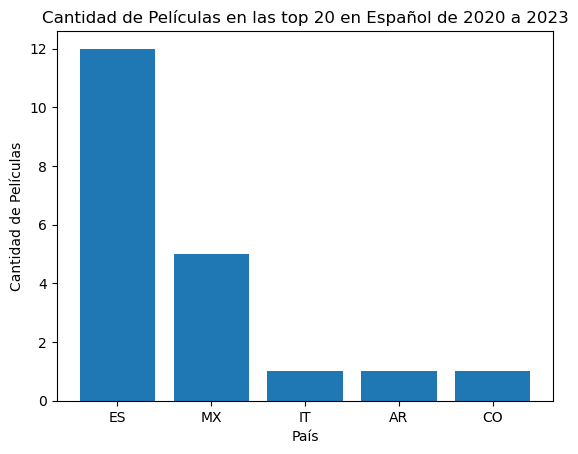

In [14]:
# grafico
plt.bar(frecuencia.keys(), frecuencia)
plt.xlabel('País')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas en las top 20 en Español de 2020 a 2023')